<a href="https://colab.research.google.com/github/Alissssssa2003/Alissssssa2003/blob/main/2_%D0%BB%D0%B0%D0%B1%D0%BE%D1%87%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Лабораторная работа №2 - Keras

* тезисно - решаете задачу регрессии ИЛИ классификации
* Набор данных ищете сами, можете смело взять с прошлой лабы

Для классификации:
* использовать минимум две метрики для оценки качества классификатора
* построить минимум три варианта сеток
* для тестовой выборки построить матрицу ошибок(матрица путаницы) - сделать выводы о качестве модели
* реализовать функцию, которая по входным параметрам возвращает предсказанное с помощью сетки значение

Для регрессии:
* использовать минимум две метрики для оценки качества модели
* построить минимум три варианта сеток
* для тестовой выборки построить график сравнения предсказанных значений и с реальными (true vs pred)
* реализовать функцию, которая по входным параметрам возвращает предсказанное с помощью сетки значение

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv("gladiator_data.csv")

In [ ]:
df.columns

Index(['Name', 'Age', 'Birth Year', 'Origin', 'Height', 'Weight', 'Category',
       'Wins', 'Losses', 'Special Skills', 'Weapon of Choice', 'Patron Wealth',
       'Equipment Quality', 'Public Favor', 'Injury History',
       'Mental Resilience', 'Diet and Nutrition', 'Tactical Knowledge',
       'Allegiance Network', 'Battle Experience', 'Psychological Profile',
       'Health Status', 'Personal Motivation', 'Previous Occupation',
       'Training Intensity', 'Battle Strategy', 'Social Standing',
       'Crowd Appeal Techniques', 'Survived'],
      dtype='object')

In [ ]:
categ_cols = df[["Origin","Category",'Special Skills', 'Weapon of Choice', 'Patron Wealth','Equipment Quality','Injury History','Diet and Nutrition', 'Tactical Knowledge','Allegiance Network','Psychological Profile','Health Status', 'Personal Motivation', 'Previous Occupation','Training Intensity', 'Battle Strategy', 'Social Standing','Crowd Appeal Techniques']]

In [ ]:
num_cols = df[["Height","Weight","Wins","Losses","Public Favor","Mental Resilience","Battle Experience"]]

In [ ]:
label = list(categ_cols.columns)
label

['Origin',
 'Category',
 'Special Skills',
 'Weapon of Choice',
 'Patron Wealth',
 'Equipment Quality',
 'Injury History',
 'Diet and Nutrition',
 'Tactical Knowledge',
 'Allegiance Network',
 'Psychological Profile',
 'Health Status',
 'Personal Motivation',
 'Previous Occupation',
 'Training Intensity',
 'Battle Strategy',
 'Social Standing',
 'Crowd Appeal Techniques']

In [ ]:
df_encoded = df.copy()
for l in label:
    one_hot_encoded = pd.get_dummies(df[l]).astype(int)
    # Drop the original column that was encoded from df_encoded
    df_encoded = df_encoded.drop(l, axis=1)
    # Concatenate one-hot encoded columns with original DataFrame
    df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

Предоставленный код создает фигуру Matplotlib с четырьмя строками и тремя столбцами подзаголовков и рисует гистограмму с оценкой плотности ядра (KDE) для каждого столбца в num_cols в отдельном подзаголовке.

C:\Users\vpopv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vpopv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vpopv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\vpopv\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

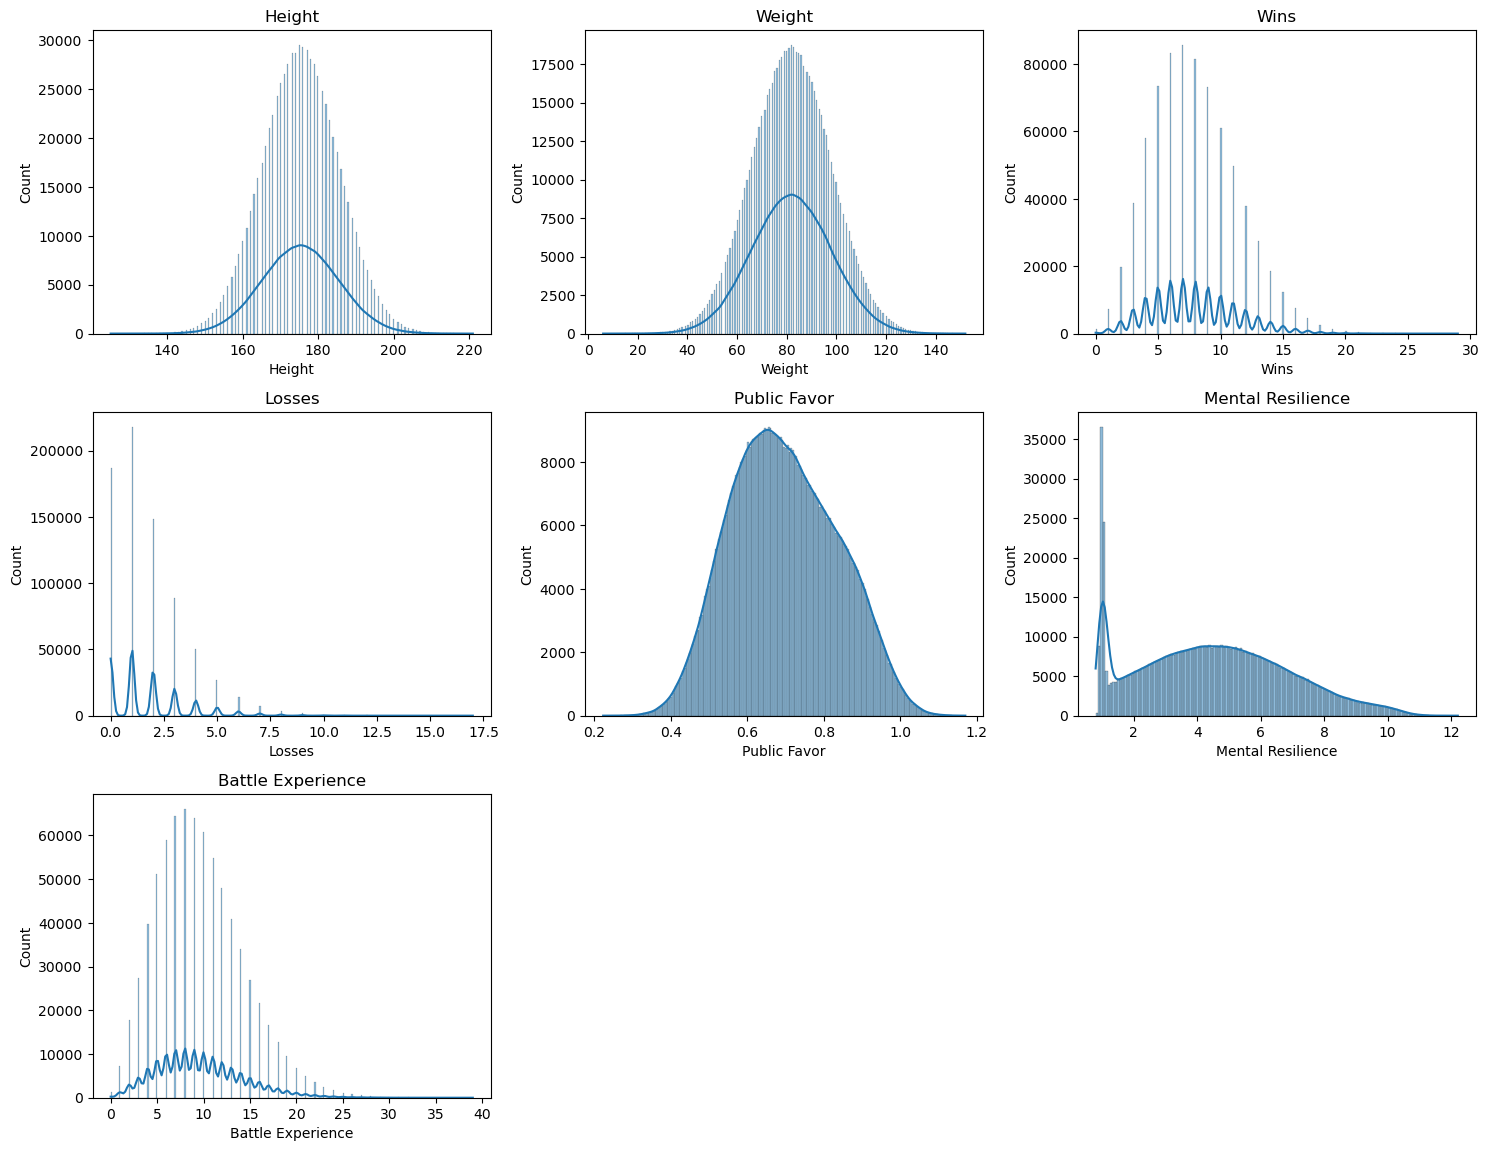

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(num_cols, 1):
    plt.subplot(4, 3, i)
    sns.histplot(num_cols[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


# Создайте экземпляр MinMaxScaler
scaler = StandardScaler()

# Примените масштабирование только к выбранным признакам
df_num_scaled = scaler.fit_transform(num_cols)

In [ ]:
df_encoded[list(num_cols.columns)] = df_num_scaled

In [ ]:
x = df_encoded.drop(["Survived","Name"],axis=1)
y = df_encoded["Survived"]

In [ ]:
from sklearn.model_selection import train_test_split
#разделение выборок
X_train_full,X_test,y_train_full,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
X_train.shape

(477686, 81)

In [ ]:
model1 = keras.models.Sequential()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-06) #ограничиваем скорость обучения - если пустить на самотек, то тоже будет грустно

In [ ]:
model1.add(Dense(100, activation='relu', input_dim=81))
model1.add(Dense(50, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))

model1.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.BinaryCrossentropy()])

history=model1.fit(X_train_full, y_train_full, epochs=25, batch_size=256, validation_split=0.2)

acc=model1.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step - binary_accuracy: 0.5014 - binary_crossentropy: 7.1402 - loss: 7.1402 - val_binary_accuracy: 0.4964 - val_binary_crossentropy: 4.0013 - val_loss: 4.0013
Epoch 2/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.5011 - binary_crossentropy: 2.9430 - loss: 2.9430 - val_binary_accuracy: 0.5327 - val_binary_crossentropy: 0.7435 - val_loss: 0.7435
Epoch 3/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.5812 - binary_crossentropy: 0.7057 - loss: 0.7057 - val_binary_accuracy: 0.6203 - val_binary_crossentropy: 0.6677 - val_loss: 0.6677
Epoch 4/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.6336 - binary_crossentropy: 0.6600 - loss: 0.6600 - val_binary_accuracy: 0.6649 - val_binary_crossentropy: 0.6443 - val_loss: 0.6443
Epoch 5/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - binary_accuracy: 0.6717 - binary_crossentropy: 0.6401 - loss: 0.6401 - val_binary_accuracy: 0.6835 - val_binary_

In [ ]:
model2 = keras.models.Sequential()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-06) #ограничиваем скорость обучения - если пустить на самотек, то тоже будет грустно

In [ ]:
model2.add(Dense(500, activation='relu', input_dim=81))
model2.add(Dense(250, activation='relu'))
model2.add(Dense(100, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

model2.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.BinaryCrossentropy()])

history=model2.fit(X_train_full, y_train_full, epochs=25, batch_size=256, validation_split=0.2)

acc=model2.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - binary_accuracy: 0.4984 - binary_crossentropy: 1.7416 - loss: 1.7416 - val_binary_accuracy: 0.5963 - val_binary_crossentropy: 0.6719 - val_loss: 0.6719
Epoch 2/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.6198 - binary_crossentropy: 0.6650 - loss: 0.6650 - val_binary_accuracy: 0.6711 - val_binary_crossentropy: 0.6447 - val_loss: 0.6447
Epoch 3/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.6861 - binary_crossentropy: 0.6352 - loss: 0.6352 - val_binary_accuracy: 0.7098 - val_binary_crossentropy: 0.6105 - val_loss: 0.6105
Epoch 4/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.7174 - binary_crossentropy: 0.6035 - loss: 0.6035 - val_binary_accuracy: 0.7330 - val_binary_crossentropy: 0.5859 - val_loss: 0.5859
Epoch 5/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - binary_accuracy: 0.7374 - binary_crossentropy: 0.5796 - loss: 0.5796 - val_binary_accuracy: 0.7440 - val_binary_

In [ ]:
model3 = keras.models.Sequential()

In [ ]:
opt = keras.optimizers.Adam(learning_rate=1e-06)

In [ ]:
model3.add(Dense(500, activation='relu', input_dim=81))
model3.add(Dense(250, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

model3.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=[tf.keras.metrics.BinaryAccuracy(),tf.keras.metrics.BinaryCrossentropy()])

history=model3.fit(X_train_full, y_train_full, epochs=25, batch_size=256, validation_split=0.2)

acc=model3.evaluate(X_test,y_test)
print(np.array(acc)[1].round(2))

C:\Users\vpopv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - binary_accuracy: 0.5100 - binary_crossentropy: 0.9235 - loss: 0.9235 - val_binary_accuracy: 0.6307 - val_binary_crossentropy: 0.6569 - val_loss: 0.6569
Epoch 2/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.6525 - binary_crossentropy: 0.6487 - loss: 0.6487 - val_binary_accuracy: 0.6981 - val_binary_crossentropy: 0.6277 - val_loss: 0.6277
Epoch 3/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - binary_accuracy: 0.7081 - binary_crossentropy: 0.6196 - loss: 0.6196 - val_binary_accuracy: 0.7277 - val_binary_crossentropy: 0.5973 - val_loss: 0.5973
Epoch 4/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.7379 - binary_crossentropy: 0.5880 - loss: 0.5880 - val_binary_accuracy: 0.7495 - val_binary_crossentropy: 0.5689 - val_loss: 0.5689
Epoch 5/25
1866/1866 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - binary_accuracy: 0.7538 - binary_crossentropy: 0.5619 - loss: 0.5619 - val_binary_accuracy: 0.7618 - val_binary_

In [ ]:
model2.evaluate(X_test,y_test)

4665/4665 ━━━━━━━━━━━━━━━━━━━━ 4s 842us/step - binary_accuracy: 0.8284 - binary_crossentropy: 0.3816 - loss: 0.3816


[0.38106000423431396, 0.8292983770370483, 0.38106000423431396]

In [ ]:
#предсказание
y_pred = model2.predict(X_test) > 0.5
y_pred[:30]

4665/4665 ━━━━━━━━━━━━━━━━━━━━ 4s 808us/step


array([[False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False]])

In [ ]:
y_pred = y_pred.reshape(-1)*1
y_pred[:10]

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0])

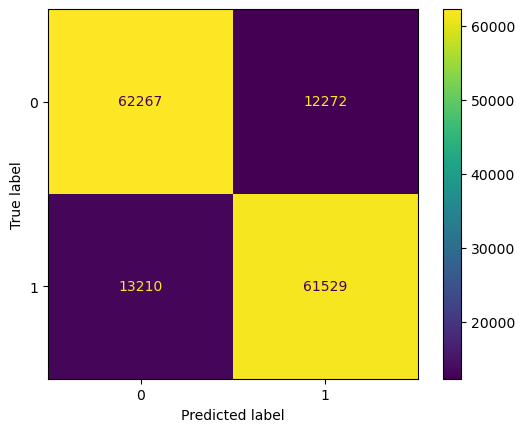

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
def generate_data(data, model):
    res = data.copy()
    categ_cols = res[["Origin","Category",'Special Skills', 'Weapon of Choice', 'Patron Wealth','Equipment Quality','Injury History','Diet and Nutrition', 'Tactical Knowledge','Allegiance Network','Psychological Profile','Health Status', 'Personal Motivation', 'Previous Occupation','Training Intensity', 'Battle Strategy', 'Social Standing','Crowd Appeal Techniques']]
    num_cols = res[["Height","Weight","Wins","Losses","Public Favor","Mental Resilience","Battle Experience"]]
    label = list(categ_cols.columns)
    df_encoded = res.copy()

    for l in label:
        one_hot_encoded = pd.get_dummies(res[l]).astype(int)
        # Drop the original column that was encoded from df_encoded
        df_encoded = df_encoded.drop(l, axis=1)
        # Concatenate one-hot encoded columns with original DataFrame
        df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

    # Масштабирование числовых столбцов
    df_num_scaled = scaler.transform(num_cols)
    df_encoded[list(num_cols.columns)] = df_num_scaled

    y_pred = model.predict(df_encoded)  # Предполагается, что у вас есть обученная модель model
    return y_pred


In [ ]:
data_t = df.copy()

In [ ]:
data_t = data_t.drop(["Name","Survived"],axis=1)

In [ ]:
data_t

,Age,Birth Year,Origin,Height,Weight,Category,Wins,Losses,Special Skills,Weapon of Choice,...,Allegiance Network,Battle Experience,Psychological Profile,Health Status,Personal Motivation,Previous Occupation,Training Intensity,Battle Strategy,Social Standing,Crowd Appeal Techniques
0,21,29,Gaul,180,74,Hoplomachus,4,1,Novice,Dagger,...,Moderate,5,Fearful,Excellent,Vengeance,Criminal,Medium,Balanced,Low,Humble
1,36,14,Numidia,174,80,Thraex,10,2,Novice,Sica (Curved Sword),...,Strong,12,Fearful,Excellent,Freedom,Entertainer,Medium,Balanced,Medium,Charismatic
2,29,21,Germania,157,94,Hoplomachus,6,2,Speed,Spear,...,Strong,8,Aggressive,Excellent,Glory,Unemployed,Medium,Aggressive,Medium,Charismatic
3,21,29,Greece,177,72,Thraex,7,1,Tactics,Sica (Curved Sword),...,Strong,8,Stoic,Excellent,Glory,Laborer,Medium,Aggressive,Medium,Charismatic
4,26,24,Rome,178,104,Provocator,5,0,Novice,Dagger,...,Moderate,5,Calculative,Excellent,Wealth,Entertainer,Medium,Aggressive,Low,Intimidating
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
746381,29,370,Greece,196,54,Retiarius,8,1,Novice,Net,...,Strong,9,Calculative,Excellent,Glory,Entertainer,Medium,Balanced,High,Charismatic
746382,43,356,Germania,177,92,Retiarius,12,0,Endurance,Trident,...,Strong,12,Stoic,Good,Glory,Laborer,Low,Balanced,High,Flamboyant
746383,40,359,Gaul,190,53,Hoplomachus,13,7,Tactics,Spear,...,Strong,20,Stoic,Good,Survival,Laborer,Low,Balanced,High,Charismatic
746384,44,355,Numidia,170,63,Thraex,14,1,Agility,Sica (Curved Sword),...,Strong,15,Calculative,Fair,Freedom,Laborer,Medium,Balanced,High,Charismatic


In [ ]:
y_test_pred = generate_data(data_t,model2)

23325/23325 ━━━━━━━━━━━━━━━━━━━━ 20s 835us/step


In [ ]:
y_test_pred

array([[0.21969002],
       [0.71503985],
       [0.606053  ],
       ...,
       [0.2522271 ],
       [0.74357677],
       [0.06304544]], dtype=float32)

In [ ]:
y_test_pred = y_pred.reshape(-1)*1
y_test_pred

array([0, 0, 1, ..., 1, 0, 0])